In [ ]:
#######################################################################################
# Author: Srijan Verma                                                              #
# School of Pharmacy                                                                #
# Sirimulla Research Group [http://www.sirimullaresearchgroup.com/]                 #
# The University of Texas at El Paso, TX, USA                                       #
# Last modified: 19/12/2019                                                         #
# Copyright (c) 2019 Srijan Verma and Sirimulla Research Group, under MIT license   #
#######################################################################################

In [1]:
from rdkit.Chem import AllChem, Descriptors
from rdkit import Chem
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
import sys
import pandas as pd
import numpy as np
from rdkit.Chem import MACCSkeys
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import RDKFingerprint
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.AtomPairs import Torsions
from rdkit.Chem.Fingerprints import FingerprintMols
import os
from rdkit.ML.Descriptors import MoleculeDescriptors
from sklearn.preprocessing import MinMaxScaler
import json

In [2]:
import pandas as pd
from tqdm import tqdm_notebook
from glob import glob
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.preprocessing import LabelEncoder

In [3]:
calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])

In [4]:
scaffold = []
for i in tqdm_notebook(range(len(Descriptors._descList))):
    scaffold.append(Descriptors._descList[i][0])

In [6]:
print(scaffold, end="")

['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA'

In [10]:
df_all_rdk_sca = pd.read_csv('../dataset/two_paper_plus_transformer_combined/imp_enz/1A1_ind.csv',index_col=0)

In [11]:
df_all_rdk_sca = df_all_rdk_sca[['Canonical_Smiles']]

In [13]:
smiles_list = df_all_rdk_sca['Canonical_Smiles'].tolist()
df_all_rdk_sca.head(2)

,Canonical_Smiles
0,CC(C)(Oc1ccc([C@H]2CC2(Cl)Cl)cc1)C(=O)O
1,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O


In [14]:
descriptors = []
for i in tqdm_notebook(range(len(smiles_list))):
    
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    m1 = Chem.MolFromSmiles(smiles_list[i])
    ds = calc.CalcDescriptors(m1)
    ds = np.asarray(list(ds))
    descriptors.append(ds)

In [17]:
rdkit_sca = []
for i in tqdm_notebook(range(len(descriptors))):
    rdkit_sca.append(descriptors[i][-85:])

In [19]:
df_all_rdk_sca = pd.DataFrame.from_records(rdkit_sca)
df_all_rdk_sca.columns = scaffold[-85:]
df_all_rdk_sca.insert(loc=0, column='Canonical_Smiles', value=smiles_list)
df_all_rdk_sca.head(2)

,Canonical_Smiles,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CC(C)(Oc1ccc([C@H]2CC2(Cl)Cl)cc1)C(=O)O,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df_all_rdk_sca_index = df_all_rdk_sca.set_index('Canonical_Smiles')

In [22]:
scaff_85 = scaffold[-85:]
tot_sum = []
sub_loc = []
files = sorted(glob('../dataset/two_paper_plus_transformer_combined/imp_enz/*csv'))
for csv in tqdm_notebook(files):
    des = []
    df = pd.read_csv(csv)
    
    for i in tqdm_notebook(range(len(df))):
        
        des.append(df_all_rdk_sca_index.loc[df['Canonical_Smiles'][i]][0:].values)
        
    df_new = pd.DataFrame.from_records(des)
    df_new.columns = scaff_85
    df_new.insert(loc=0, column='Canonical_Smiles', value=df['Canonical_Smiles'].tolist())
    df_new.insert(loc=1, column='drug_type', value=df['drug_type'].tolist())
    df_new.insert(loc=2, column='Label', value=df['Label'].tolist())
    df_new.insert(loc=3, column='drug_name', value=df['drug_name'].tolist())
    
    sum_ind = []
    for j in (range(len(scaff_85))):
        sum_ind.append(df_new[scaff_85[j]].sum())
    
    tot_sum.append(sum_ind)
    out = os.path.splitext(os.path.basename(csv))[0]
    print(out,'---')
    sub_loc.append(out)
    
    df_new.to_csv('../dataset/two_paper_plus_transformer_combined/rdk_des_scaffold_analysis/scaffold_ind_files/'+out+'.csv')
    
df_map = pd.DataFrame.from_records(tot_sum)
df_map.columns = scaff_85
df_map.insert(loc=0, column='drug_type', value=sub_loc)
df_map.to_csv('../dataset/two_paper_plus_transformer_combined/rdk_des_scaffold_analysis/scaffold_map_all.csv')

1A1_ind ---


1A1_inh ---


1A1_sub ---


1A2_ind ---


1A2_inh ---


1A2_sub ---


2C19_ind ---


2C19_inh ---


2C19_sub ---


2C8_ind ---


2C8_inh ---


2C8_sub ---


2C9_ind ---


2C9_inh ---


2C9_sub ---


2D6_inh ---


2D6_sub ---


2E1_ind ---


2E1_inh ---


2E1_sub ---


3A4_ind ---


3A4_inh ---


3A4_sub ---


3A5_ind ---


3A5_inh ---


3A5_sub ---


GST_ind ---


GST_inh ---


GST_sub ---


MET_ind ---


MET_inh ---


MET_sub ---


NAT_ind ---


NAT_inh ---


NAT_sub ---


SUL_ind ---


SUL_inh ---


SUL_sub ---


UGT_ind ---


UGT_inh ---


UGT_sub ---



In [23]:
files = sorted(glob('../dataset/two_paper_plus_transformer_combined/rdk_des_scaffold_analysis/scaffold_ind_files/*csv'))
tot_sum = []
sub_loc = []
for csv in tqdm_notebook(files):
    df = pd.read_csv(csv,index_col=0)
    df = df[df.Label == 'positive']
    df.reset_index(drop=True,inplace=True)

    sum_ind = []
    
    for j in (range(len(scaff_85))):
        sum_ind.append(df[scaff_85[j]].sum())
        
    tot_sum.append(sum_ind)
    out = os.path.splitext(os.path.basename(csv))[0]
    print(out,'---',len(df))
    sub_loc.append(out + '_' +str(len(df)))
    
df_map = pd.DataFrame.from_records(tot_sum)
df_map.columns = scaff_85
df_map.insert(loc=0, column='drug_type', value=sub_loc)
df_map.to_csv('../dataset/two_paper_plus_transformer_combined/rdk_des_scaffold_analysis/scaffold_map_pos.csv')

1A1_ind --- 49
1A1_inh --- 45
1A1_sub --- 49
1A2_ind --- 39
1A2_inh --- 124
1A2_sub --- 314
2C19_ind --- 16
2C19_inh --- 109
2C19_sub --- 278
2C8_ind --- 17
2C8_inh --- 96
2C8_sub --- 189
2C9_ind --- 28
2C9_inh --- 220
2C9_sub --- 329
2D6_inh --- 245
2D6_sub --- 429
2E1_ind --- 28
2E1_inh --- 72
2E1_sub --- 169
3A4_ind --- 101
3A4_inh --- 313
3A4_sub --- 707
3A5_ind --- 30
3A5_inh --- 29
3A5_sub --- 124
GST_ind --- 48
GST_inh --- 35
GST_sub --- 20
MET_ind --- 16
MET_inh --- 38
MET_sub --- 16
NAT_ind --- 30
NAT_inh --- 31
NAT_sub --- 19
SUL_ind --- 15
SUL_inh --- 17
SUL_sub --- 25
UGT_ind --- 20
UGT_inh --- 31
UGT_sub --- 66



In [24]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

In [25]:
df = df_map.drop(['drug_type'],axis=1)
df = df.div(df.max(axis=1),axis=0)

In [26]:
max(df.iloc[0])

1.0

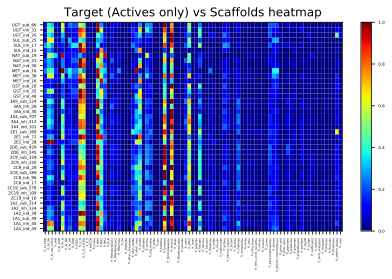

In [28]:
#https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html---different cmap colors!!
%config InlineBackend.figure_format = 'svg'
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import pylab
import matplotlib.ticker as ticker
import matplotlib

tick_spacing = 0.05
plt.title('Target (Actives only) vs Scaffolds heatmap')
Index= df_map['drug_type'].tolist()
Cols = scaff_85
df = df_map.drop(['drug_type'],axis=1)
df = df.div(df.max(axis=1),axis=0)
df = DataFrame(df.values, index=Index, columns=Cols)
plt.xticks(rotation=89)
plt.rc('xtick',labelsize=2.7)
plt.rc('ytick',labelsize=4)
norma = matplotlib.colors.Normalize()#vmin=0, vmax=1

plt.pcolor(df,cmap="jet", norm=norma) #jet, plt.cm.Blues
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.colorbar()
plt.tight_layout()
# plt.savefig('../dataset/rdkitdes/heat_map_pos.png',dpi=1200)
plt.show()

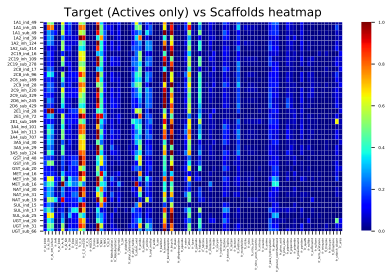

In [30]:
Index= df_map['drug_type'].tolist()
Cols = scaff_85
df = df_map.drop(['drug_type'],axis=1)
df = df.div(df.max(axis=1),axis=0)
df = DataFrame(df.values, index=Index, columns=Cols)
tick_spacing = 0.05
plt.title('Target (Actives only) vs Scaffolds heatmap')
plt.rc('xtick',labelsize=2.7)
plt.rc('ytick',labelsize=4)

sns.heatmap(df,cmap='jet',linewidths=.1)#YlGnBu, jet,linewidths=.5
plt.tight_layout()
plt.savefig('../dataset/two_paper_plus_transformer_combined/rdk_des_scaffold_analysis/heat_map_pos_norm.png',dpi=1200)

In [36]:
for i in range(0,50):
    print(df_all_rdk_sca['Canonical_Smiles'][i]+',', end="")

CC(C)(Oc1ccc([C@H]2CC2(Cl)Cl)cc1)C(=O)O,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,CCO,CCCC(CCC)C(=O)O,Cc1c(N(C)C)c(=O)n(-c2ccccc2)n1C,CO[C@@]12CC[C@]3(C[C@H]1[C@](C)(O)C(C)(C)C)[C@@H]1Cc4ccc(O)c5c4[C@]3(CCN1CC1CC1)[C@@H]2O5,CN1C(=O)CC(=O)N(c2ccccc2)c2cc(Cl)ccc21,CCc1cc2c(s1)N(C)C(=O)CN=C2c1ccccc1Cl,O=[P@@]1(N(CCCl)CCCl)NCCCO1,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,O=[P@]1(NCCCl)OCCCN1CCCl,CN(C)CCCN1c2ccccc2CCc2ccccc21,CCN(CC)CC(=O)Nc1c(C)cccc1C,CC[C@@]1(c2ccccc2)NC(=O)N(C)C1=O,CCC(=O)C(C[C@H](C)N(C)C)(c1ccccc1)c1ccccc1,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,Cc1cc(=O)n(-c2ccccc2)n1C,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CC(C)c1cccc(C(C)C)c1O,CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,CO[C@H]1C[C@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@@H](OC(C)=O)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3OC(C)=O)[C@H]2C)O[C@@H](C)[C@@H]1OC(C)=O,CC(=O)C[C@H](c1ccccc1)c1c(O)c2ccccc2oc1=O,C[C@]12CCC(=O)C=C1CC[C@@H]1

In [ ]:
a = 'CC(C)(Oc1ccc([C@H]2CC2(Cl)Cl)cc1)C(=O)O,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CCC2=O,CCO,CCCC(CCC)C(=O)O,Cc1c(N(C)C)c(=O)n(-c2ccccc2)n1C,CO[C@@]12CC[C@]3(C[C@H]1[C@](C)(O)C(C)(C)C)[C@@H]1Cc4ccc(O)c5c4[C@]3(CCN1CC1CC1)[C@@H]2O5,CN1C(=O)CC(=O)N(c2ccccc2)c2cc(Cl)ccc21,CCc1cc2c(s1)N(C)C(=O)CN=C2c1ccccc1Cl,O=[P@@]1(N(CCCl)CCCl)NCCCO1,Nc1ccc(S(=O)(=O)c2ccc(N)cc2)cc1,CN1C(=O)CN=C(c2ccccc2)c2cc(Cl)ccc21,O=C(O)Cc1ccccc1Nc1c(Cl)cccc1Cl,O=[P@]1(NCCCl)OCCCN1CCCl,CN(C)CCCN1c2ccccc2CCc2ccccc21,CCN(CC)CC(=O)Nc1c(C)cccc1C,CC[C@@]1(c2ccccc2)NC(=O)N(C)C1=O,CCC(=O)C(C[C@H](C)N(C)C)(c1ccccc1)c1ccccc1,OCCN1CCN(CCCN2c3ccccc3Sc3ccc(Cl)cc32)CC1,Cc1cc(=O)n(-c2ccccc2)n1C,O=C1NC(=O)C(c2ccccc2)(c2ccccc2)N1,CC(C)c1cccc(C(C)C)c1O,CCCCNC(=O)NS(=O)(=O)c1ccc(C)cc1,CO[C@H]1C[C@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@@H](OC(C)=O)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3OC(C)=O)[C@H]2C)O[C@@H](C)[C@@H]1OC(C)=O,CC(=O)C[C@H](c1ccccc1)c1c(O)c2ccccc2oc1=O,C[C@]12CCC(=O)C=C1CC[C@@H]1[C@@H]2[C@@H](O)C[C@]2(C=O)[C@@H](C(=O)CO)CC[C@@H]12,CC[C@@]1(c2ccc(N)cc2)CCC(=O)NC1=O,C[C@]12CC[C@H]3[C@@H](CC[C@H]4CC(=O)CC[C@@]43C)[C@@H]1CC[C@@H]2O,CC[C@H](C)[C@H](NC(=O)CN)C(=O)N[C@H](C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCC(N)=O)C(=O)N[C@H]1CSSC[C@@H]2NC(=O)[C@H]([C@@H](C)CC)NC(=O)[C@H](CO)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H](CSSC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc3cnc[nH]3)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@@H](NC(=O)[C@@H](N)Cc3ccccc3)C(C)C)C(=O)NCC(=O)N[C@@H](CO)C(=O)N[C@@H](Cc3cnc[nH]3)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](C)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](Cc3ccc(O)cc3)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C(C)C)C(=O)N[C@H](C(=O)NCC(=O)N[C@@H](CCC(=O)O)C(=O)N[C@@H](CCCNC(=N)N)C(=O)NCC(=O)N[C@@H](Cc3ccccc3)C(=O)N[C@@H](Cc3ccccc3)C(=O)N[C@@H](Cc3ccc(O)cc3)C(=O)N[C@H](C(=O)N3CCC[C@H]3C(=O)N[C@@H](CCCCN)C(=O)N[C@H](C(=O)O)[C@@H](C)O)[C@@H](C)O)CSSC[C@@H](C(=O)N[C@@H](CC(N)=O)C(=O)O)NC(=O)[C@H](Cc3ccc(O)cc3)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](Cc3ccc(O)cc3)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CO)NC2=O)NC1=O)C(C)C,CCN(CC)CCNC(=O)c1cc(Cl)c(N)cc1OC,CC(=O)[C@@H]1CC[C@@H]2[C@H]3CCC4=CC(=O)CC[C@@]4(C)[C@@H]3CC[C@]12C,O=P([O-])([O-])O,CO[C@@]1(NC(=O)CSCC#N)C(=O)N2C(C(=O)O)=C(CSc3nnnn3C)CS[C@@H]21,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=O)O)=C(CSc4nnnn4C)CS[C@H]23)c2ccc(O)cc2)C(=O)C1=O,CON=C(C(=O)N[C@@H]1C(=O)N2C(C(=O)O)=C(CSc3nc(=O)c(O)nn3C)CS[C@H]12)c1csc(N)n1,Cc1c2oc3c(C)ccc(C(=O)N[C@H]4C(=O)N[C@@H](C(C)C)C(=O)N5CCC[C@@H]5C(=O)N(C)CC(=O)N(C)[C@H](C(C)C)C(=O)O[C@H]4C)c3nc-2c(C(=O)N[C@H]2C(=O)N[C@@H](C(C)C)C(=O)N3CCC[C@@H]3C(=O)N(C)CC(=O)N(C)[C@H](C(C)C)C(=O)O[C@H]2C)c(N)c1=O,CC(=O)O[C@@]12CO[C@@H]1C[C@H](O)[C@@]1(C)C(=O)[C@H](O)C3=C(C)[C@@H](OC(=O)[C@@H](O)[C@@H](NC(=O)OC(C)(C)C)c4ccccc4)C[C@@](O)([C@@H](OC(=O)c4ccccc4)[C@@H]12)C3(C)C,C[C@@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C@H]2O,NC(=O)NO,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(C(=O)N[C@@H](CCC(=O)O)C(=O)O)cc1,O=C1c2c(O)ccc(O)c2C(=O)c2c(NCCNCCO)ccc(NCCNCCO)c21,CC(=O)O[C@H]1C(=O)[C@]2(C)[C@@H](O)C[C@H]3OC[C@@]3(OC(C)=O)[C@H]2[C@H](OC(=O)c2ccccc2)[C@]2(O)C[C@H](OC(=O)[C@H](O)[C@@H](NC(=O)c3ccccc3)c3ccccc3)C(C)=C1C2(C)C,CC[C@H](C)[C@@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[C@H](Cc1c[nH]cn1)NC(=O)[C@H](CO)NC(=O)[C@H]1CCCN1C(=O)[C@H](CC(=O)O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCC(N)=O)NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H](CCCCN)NC(=O)[C@H](NC(=O)[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CCSC)NC(=O)[C@H](CCCNC(=N)N)NC(=O)CNC(=O)[C@H](CO)NC(=O)[C@H]1CCCN1C(=O)[C@H](C)NC(=O)[C@@H](N)CCCCN)[C@H](C)CC)C(C)C)C(=O)N[C@@H](CO)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@H](C(=O)N[C@@H](CCSC)C(=O)NCC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N[C@@H](CCSC)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](Cc1ccccc1)C(N)=O)c1ccc(OS(=O)(=O)O)cc1,O=C1OC(c2ccc(O)c(S(=O)(=O)O)c2)(c2ccc(O)c(S(=O)(=O)O)c2)c2c(Br)c(Br)c(Br)c(Br)c21,Cc1cc(C)c(NC(=O)CN(CC(=O)O)CC(=O)O)c(C)c1Br,CC[C@H]1OC(=O)[C@H](C)C(=O)[C@H](C)[C@@H](O[C@@H]2O[C@H](C)C[C@H](N(C)C)[C@H]2O)[C@](C)(OC)C[C@@H](C)C(=O)[C@H](C)[C@H]2N(CCCCn3cnc(-c4cccnc4)c3)C(=O)O[C@]12C,CCC(=O)O[C@H]1CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@]12C,CC(C)(C#N)c1cc(Cn2cncn2)cc(C(C)(C)C#N)c1,C[C@H]1C[C@H]2[C@@H]3CCC4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@@]1(O)C(=O)CO,c1ccc(-c2ccc([C@H](c3ccccc3)n3ccnc3)cc2)cc1,CCCC(=O)Nc1ncnc2c1ncn2[C@@H]1O[C@@H]2CO[P@@](=O)(O)O[C@H]2[C@H]1OC(=O)CCC'